# Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sns

# Importing, plotting and cleaning data

### Importing the data

In [2]:
total_df = pd.read_csv(r"C:\Users\titou\Desktop\python_test_files\ML_classic\hackathon\titanic_hackathon\train.csv")
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Plotting the data

In [3]:
numerical_columns = total_df.columns[total_df.dtypes != "object"]
categorical_columns = total_df.columns[total_df.dtypes == "object"]

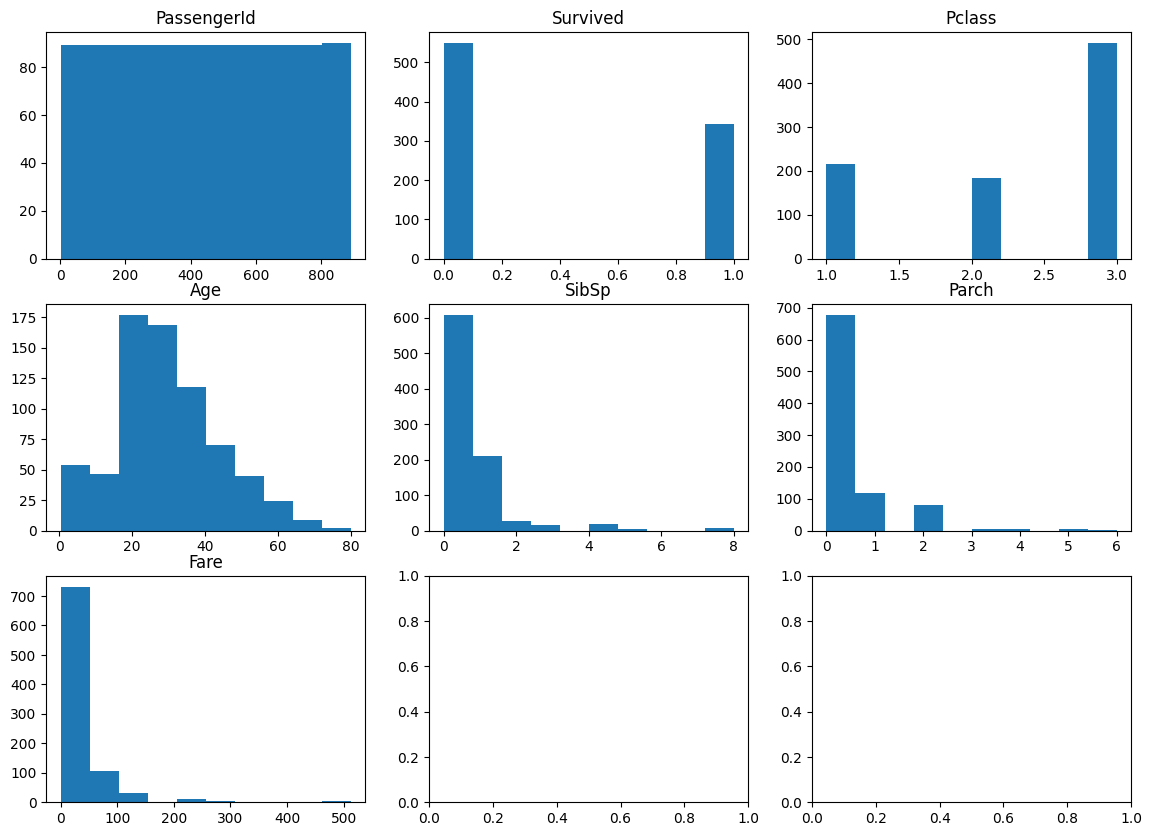

In [4]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14,10))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    total_df[col].plot(kind="hist", ax=axes[i], title=col)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

### Handling categorical data

In [5]:
total_df_numerical = total_df[numerical_columns].drop(columns="PassengerId")
total_df_categorical = pd.get_dummies(total_df[["Sex", "Embarked"]], dtype="int",dummy_na=True)
total_df_reformated = pd.concat([total_df_numerical, total_df_categorical], axis=1)

<Axes: >

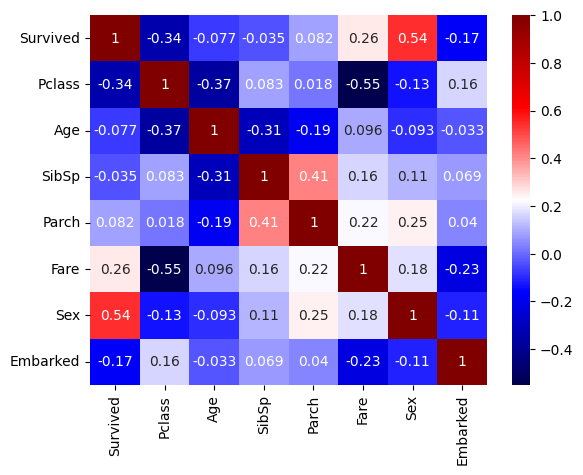

In [6]:
sns.heatmap(pd.concat([
    total_df_numerical, 
    total_df["Sex"].map({"male":0, "female":1}), 
    total_df["Embarked"].map({None:-1, "C":0, "Q":1, "S":2}
                             )], axis=1).corr(), annot=True, cmap="seismic")

# Splitting and reformating the data

### Splitting the data

In [7]:
total_X_df = total_df_reformated[total_df_reformated.columns[total_df_reformated.columns != "Survived"]]
total_y_df = total_df_reformated[["Survived"]]

X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(total_X_df, total_y_df, test_size=0.20, random_state=42)
y_train, y_test = y_train_df.values, y_test_df.values

### Handling nan values

In [8]:
impute = SimpleImputer()
X_train = impute.fit_transform(X_train_df)
X_test = impute.transform(X_test_df)

### Normalizing

In [9]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)


# Fitting the models

### Logistic regression

In [10]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_test_predict = model_lr.predict(X_test)
print(f"On logistic regression, the accuracy is of {accuracy_score(y_test, y_test_predict):.2f}")

On logistic regression, the accuracy is of 0.81


c:\Users\titou\Desktop\python_test_files\virtual_environments\ml_env\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Random Forest

In [11]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_test_predict = model_rf.predict(X_test)
print(f"On random forest, the accuracy is of {accuracy_score(y_test, y_test_predict):.2f}")

On random forest, the accuracy is of 0.80


c:\Users\titou\Desktop\python_test_files\virtual_environments\ml_env\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


### XGBoost

In [12]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
y_test_predict = model_xgb.predict(X_test)
print(f"On logistic regression, the accuracy is of {accuracy_score(y_test, y_test_predict):.2f}")

On logistic regression, the accuracy is of 0.80
